<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap6_Spline%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 6.1 1차 및 2차 스플라인

## 1차 스플라인

스플라인 함수는 어떤 매끄러운 조건을 가진 다항식의 조각들로 이루어진 함수이다. 예로 다변형 polygonal함수 또는 1차 스플라인으로 불리는 이 함수는 각 조각들이 연속성을 가지고 서로 연결되는 선형 다항식이다.

스플라인 이론에서는 함수의 성질이 바뀌는 점인 $t_{0}, t_{1}, t_{2}, \cdots , t_{n}$을 절점 knot이라 지칭한다.

$\boxtimes$ **정리 1** 1차 스플라인

다음을 만족하는 함수 $S$를 1차 스플라인이라 부른다.

1. $S$의 정의역은 구간 $[a, b]$이다.
2. $S$는 $[a, b]$에서 연속이다.
3. 각 부분구간 $[t_{i}, t_{i+1}]$에서 $S$가 선형 다항식임을 만족하는 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재한다.

일반적으로 구간 $[a, b]$외부에서 $S(x)$는 $a$의 왼쪽 영역에서는 가장 왼쪽의 부분구간 $[t_{0}, t_{1}]$의 함수로 정의하고, $b$의 오른쪽 영역에서는 가장 오른쪽의 부분구간 $[t_{n-1}, t_{n}]$의 함수로 정의한다.

스플라인 부분 : 선형 $S_{i}(x)$

구간 $[t_{i}, t_{i+1}]$에서 다음을 얻는다.
$$S_{i}(x) = y_{i} + m_{i}(x-t_{i}) = y_{i} + \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}(x - t_{i})$$

함수 $S$는 계수 $n$개와 상수 $n$개 총 $2n$개의 변수와, $2n$개의 조건으로 변수의 수와 조건의 수가 같다. 조건이라 함은 각 구성 함수 $S_{i}$가 부분구간의 양 끝점에서의 데이터를 보간한다는 것이다.

또한 $t_{0} \leq x \leq t_{n}$이면, $x$를 포함하는 구간 $[t_{i}, t_{i+1}]$는 $x - t_{i}$가 $x-t_{n-1}, x-t_{n-2}, \cdots, x-t_{0}$ 중 처음으로 음이 아닌 값이라는 사실로 특정지어진다.

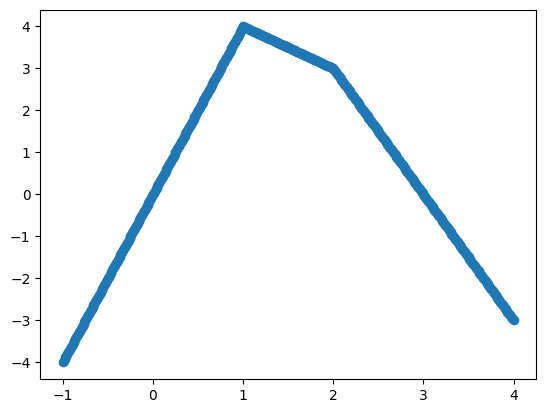

In [21]:
#스플라인 1차 함수
def Spline1(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

t_00 = [0, 1, 2, 3]
y_00 = [0, 4, 3, 0]
#Spline1(3, t_00, y_00, 2.5)

x_00 = np.arange(-1, 4.01, 0.01)
y_01 = np.array([Spline1(3, t_00, y_00, x__) for x__ in x_00])
plt.scatter(x_00, y_01)
plt.show()

## 연속계수

1차 스플라인을 통해 함수를 보간할 때 그 적합성을 평가하기 위해 함수 $f$의 연속계수 modulus of continuity라는 것을 정의할 필요가 있다.

$f$의 연속계수는 다음과 같다.

$$w(f;\;h) = sup\{|f(u) - f(v)| : a \leq u \leq v \leq b, |u-v| \leq h\}$$

만약 $f$가 구간 내에서 연속이면 $f$는 균등 연속 uniformly continuous이고, $h$가 $0$에 가까이 감에 따라 $w(f;\;h)$도 $0$에 가까이 간다. 반대의 경우는 그렇지 않다.

만약 $f$가 구간 $(a, b)$에서 미분가능하고 $f'(x)$가 $(a, b)$에서 유계이면 연속계수의 추정값을 얻는 데 평균값 정리를 사용할 수 있다.

$$|f(u) - f(v)| = |f'(c)(u-v)| \leq M_{1} |u-v| \leq M_{1}h$$

그리고 또한 $f$를 보간하는 1차 다항식 $p$가 있고, $h = b-a$일 때, 다음을 얻을수 있다.

$$|f(x) - p(x)| \leq w(f; \;h)$$

**증명**

선형 함수 $p$는 다음과 같은 식으로 주어진다.

$$p(x) = (\frac{x-a}{b-a})f(b) + (\frac{b-x}{b-a})f(a) $$
$$f(x) - p(x) = (\frac{x-a}{b-a})[f(x) - f(b)] + (\frac{b-x}{b-a})[f(x) - f(a)]$$

->

\begin{eqnarray}
    |f(x) - p(x)| & \leq &(\frac{x-a}{b-a})|f(x) - f(b)| + (\frac{b-x}{b-a})|f(x) - f(a)| \\
		& \leq &(\frac{x-a}{b-a})w(f;\;h) + (\frac{b-x}{b-a})w(f;\;h) \\
		& = & [(\frac{x-a}{b-a}) + (\frac{b-x}{b-a})]w(f;\;h) = w(f;\;h)
\end{eqnarray}

##2차 스플라인

$\boxtimes$ **정리 1** 2차 스플라인

다음을 만족하는 함수 $Q$를 2차 스플라인이라 부른다.

1. $Q$의 정의역은 구간 $[a, b]$이다.
2. $Q$ 와 $Q'$ $[a, b]$에서 연속이다.
3. 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재하고, $Q$는 각 부분구간 $[t_{i}, t_{i+1}]$에서 최대 2차의 다항식이다.

이 때, $Q'(x)$는 연속이므로 $z_{i} \equiv Q'(t_{i})$로 두면, $Q_{i}$의 식은 다음과 같다.

$$Q_{i}(x) = \frac{z_{i+1} - z_{i}}{2(t_{i+1} - t_{i})}(x-t_{i})^{2} + z_{i}(x - t_{i}) + y_{i}$$

그리고 위 식이 연속임을 이용해 수정하면 다음 식을 얻을 수 있다.

$$z_{i+1} = -z_{i} + 2(\frac{y_{i+1} - y_{i}}{t_{i+1}-t_{i}})$$

이 식은 임의의 값 $z_{0}$으로부터 시작해서 재귀적으로 벡터 $[z_{0}, z_{1}, \cdots , z_{n}]^{T}$를 얻는 데 사용될 수 있다.

In [13]:
#ex3
def Spline2(n, t_, y_, x, z_0):
  recurs_z = [z_0]
  for i in range(n):
    recurs_z.append(2*(y_[i+1] - y_[i])/(t_[i+1] - t_[i])-recurs_z[-1] )

  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(recurs_z[k]) + (x-t_[k])**2 * (recurs_z[k+1] - recurs_z[k])/(2*(t_[k+1] - t_[k]))
  return spline_result

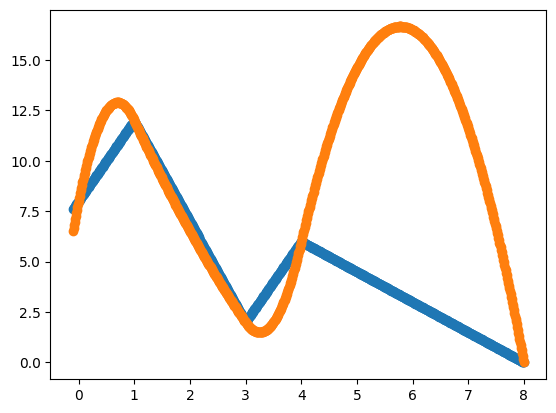

In [45]:
t_03 = [0, 1, 3, 4, 8]
y_03 = [8, 12, 2, 6, 0]

x_03 = np.arange(-0.1, 8.01, 0.01)
q_031 = np.array([Spline1(4, t_03, y_03, x__) for x__ in x_03])
q_032 = np.array([Spline2(4, t_03, y_03, x__, 14) for x__ in x_03])

plt.scatter(x_03, q_031)
plt.scatter(x_03, q_032)
plt.show()

In [46]:
# @title
#1
def Spline1_up(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[i]) > 0:
      k = i+1
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

In [105]:
# @title
#3
#구간별 2차 선형 다항식
def Bi_Linear(n, m, x_, y_, z_, input):
  i = 0
  for k in range(n):
    if not (input[0] - x_[k]) > 0:
      i = k + 1
      break

  j = 0
  for k in range(m):
    if not (input[1] - y_[k]) > 0:
      j = k + 1
      break

  p_1 = ((x_[i] - input[0])*(y_[j]-input[1])*z_[i+1,j+1] + (x_[i+1] - input[0])*(y_[j+1]-input[1])*z_[i,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p_2 = ((x_[i+1] - input[0])*(y_[j]-input[1])*z_[i,j+1] + (x_[i] - input[0])*(y_[j+1]-input[1])*z_[i+1,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p = p_1 - p_2

  return p

In [106]:
x_13 = [0, 1, 2, 3]
y_13 = [-1, 0, 1]
X_13, Y_13 = np.meshgrid(x_13, y_13)
z_13 = np.exp(X_13 + Y_13)
z_13 = np.transpose(z_13)

In [107]:
z_13

array([[ 0.36787944,  1.        ,  2.71828183],
       [ 1.        ,  2.71828183,  7.3890561 ],
       [ 2.71828183,  7.3890561 , 20.08553692],
       [ 7.3890561 , 20.08553692, 54.59815003]])

In [101]:
x_03 = np.arange(-0.1, 3.1, 0.01)
y_03 = np.arange(-1.1, 0.1, 0.01)


p_13 = np.array([ Bi_Linear(3, 2, x_13, y_13, z_13, (x__, y__)) for x__, y__ in (x_03, y_03) ])

plt.scatter(x_03, q_031)
plt.scatter(x_03, q_032)
plt.show()

ValueError: too many values to unpack (expected 2)

In [85]:
y_13

array([[-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

In [109]:
p_13 = np.array([ Bi_Linear(3, 2, x_13, y_13, z_13, (x__, y__)) for x__, y__ in zip(x_03, y_03) ])

IndexError: index 3 is out of bounds for axis 1 with size 3

In [108]:
Bi_Linear(3, 2, x_13, y_13, z_13, (0, 1))

-3.186703055566076

In [104]:
y_13

[-1, 0, 1]

In [99]:
(0 - x_13[0]) == 0

array([ True, False, False, False])

In [97]:
x_03.shape

(121, 320)

In [91]:
y_03[0].shape

(320,)

In [77]:
for x__, y__ in zip(x_13, y_13):
  print(x__, y__)

[0 1 2 3] [-1 -1 -1 -1]
[0 1 2 3] [0 0 0 0]
[0 1 2 3] [1 1 1 1]


In [76]:
x_13.shape

(3, 4)

In [86]:
y_13

array([[-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

In [79]:
x_13

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [80]:
z_13

array([[ 0.36787944,  1.        ,  2.71828183],
       [ 1.        ,  2.71828183,  7.3890561 ],
       [ 2.71828183,  7.3890561 , 20.08553692],
       [ 7.3890561 , 20.08553692, 54.59815003]])